# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **religious events or traditions** (see below) for the region of **Portland, Oregon, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Portland, Oregon, United States** to Ann Arbor, USA. In that case at least one source file must be about **Portland, Oregon, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Portland, Oregon, United States** and **religious events or traditions**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **religious events or traditions**?  For this category you might consider calendar events, demographic data about religion in the region and neighboring regions, participation in religious events, or how religious events relate to political events, social movements, or historical events.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)


Data comes from U.S. Religion Census 1952 to 2020
http://www.usreligioncensus.org/compare.php

link1: https://github.com/xintao0202/Applied-Data-Science-with-Python/blob/master/Applied%20Plotting%2C%20Charting%20%26%20Data%20Representation/1916.csv

link2: https://github.com/xintao0202/Applied-Data-Science-with-Python/blob/master/Applied%20Plotting%2C%20Charting%20%26%20Data%20Representation/19152.csv

link3: https://github.com/xintao0202/Applied-Data-Science-with-Python/blob/master/Applied%20Plotting%2C%20Charting%20%26%20Data%20Representation/1971.csv

link4: https://github.com/xintao0202/Applied-Data-Science-with-Python/blob/master/Applied%20Plotting%2C%20Charting%20%26%20Data%20Representation/1980.csv

link5: https://github.com/xintao0202/Applied-Data-Science-with-Python/blob/master/Applied%20Plotting%2C%20Charting%20%26%20Data%20Representation/1990.csv

link6: https://github.com/xintao0202/Applied-Data-Science-with-Python/blob/master/Applied%20Plotting%2C%20Charting%20%26%20Data%20Representation/2000.csv

link7: https://github.com/xintao0202/Applied-Data-Science-with-Python/blob/master/Applied%20Plotting%2C%20Charting%20%26%20Data%20Representation/2010.csv

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib notebook

# read all datasets, only select whole population and religious adherents for columns and portland area for rows

years=[1916, 1952, 1971, 1980, 1990, 2000, 2010]
df=None

for year in years:
    df_temp=pd.read_csv(str(year)+'.csv', skiprows=[0,1,2,3],  engine='python')
    df_temp=df_temp.loc[:,['Population','Adherents']].loc[df_temp['Metro Area']=='Portland-Vancouver-Hillsboro, OR-WA, Metropolitan Statistical Area']
    df_temp['Year']=year
    df=pd.concat([df,df_temp])
 


In [71]:
# change index and column names

df.rename(columns={'Population': 'Total Population', 'Adherents': 'Religious Adherents'}, inplace=True)

In [93]:
# add column of Religious Population Ratio
df['Religious Population Ratio']=df['Religious Adherents']/df['Total Population']
# need to make year type as object (string), otherwise can't plot bar and scatter together
df['Year']=df['Year'].astype(str)
 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 663 to 677
Data columns (total 4 columns):
Total Population              7 non-null int64
Religious Adherents           7 non-null int64
Year                          7 non-null object
Religious Population Ratio    7 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 280.0+ bytes


<IPython.core.display.Javascript object>


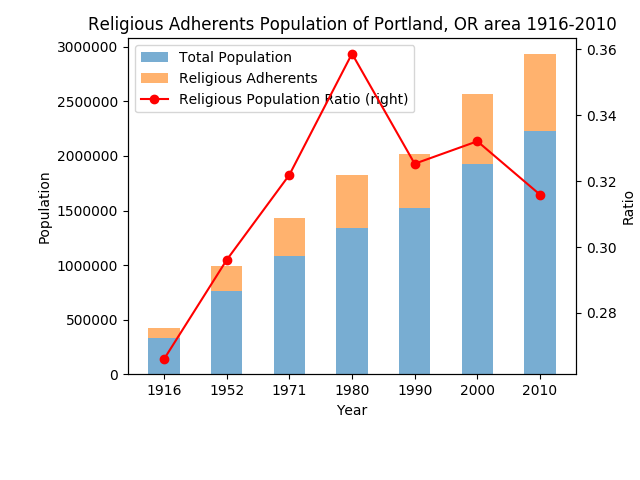

In [138]:
# plot the two variables as bar chart, add line plot as a subplot

import matplotlib.pyplot as plt 
import pandas as pd

ax=df.plot(x='Year', y=['Total Population','Religious Adherents'], title='Religious Adherents Population of Portland, OR area 1916-2010', kind="bar", alpha=0.6, stacked=True)

ax2=df.plot( x='Year', y=['Religious Population Ratio'], linestyle='-', marker='o',secondary_y=True, c='red', ax=ax)

ax.autoscale()
ax.set_ylabel('Population')
ax2.set_ylabel('Ratio')

plt.subplots_adjust(wspace=0.8, hspace=0.6, left=0.2, bottom=0.22, right=0.9, top=0.92)

In [107]:
df

,Total Population,Religious Adherents,Year,Religious Population Ratio
663,335581,89256,1916,0.265975
669,766068,226818,1952,0.296081
676,1083977,348922,1971,0.321891
676,1341491,481174,1980,0.358686
677,1523741,495634,1990,0.325274
677,1927881,640242,2000,0.332096
677,2226009,703214,2010,0.315908
